In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sys
#!{sys.executable} -m pip install pyglet
import geoplotlib
from geoplotlib.utils import read_csv
import geopy
from geopy.geocoders import Nominatim
from pygeocoder import Geocoder
import time
import csv
from random import seed
from random import randint
import seaborn as sns
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='argun', api_key='sNRvMi08pkDsBVPHNaFQ')
import pyglet
print (plotly.__version__)

#------creating dataframe from json file-------
pd.set_option('display.max_columns', 500)
with open('unicorns2016parsed.json') as data_file:    
    data = json.load(data_file)
df = pd.DataFrame(data)

#-------dropping redundant rows-------
to_drop = ['Legal Name',
           'Rank',
           'Description',
           'Slogan']
df.drop(to_drop, inplace=True, axis=0)

df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162']

#------csv to list------
with open('coordinates.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)

col_names =  ['lat', 'lon']
row_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162']
newdf = pd.DataFrame(index = row_names, columns = col_names)   

coordSplit = []
for i in range(len(your_list)):
    holder = your_list[i][0]
    coordSplit.append(holder.split(","))
    newdf.set_value(str(i),'lat', coordSplit[i][0])
    newdf.set_value(str(i), 'lon', coordSplit[i][1])

#transpose dataframe
df = df.T
sns.set(rc={'figure.figsize':(14,9)})
sns.set(style="whitegrid")
sns.set(font_scale = 1)

3.1.1


/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



<Figure size 432x288 with 0 Axes>

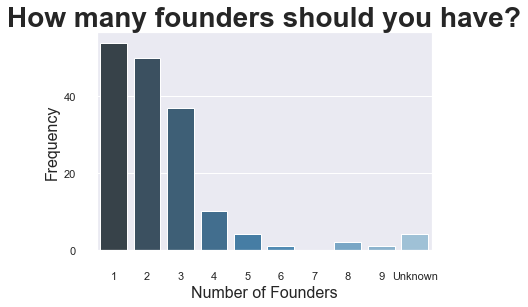

<Figure size 432x288 with 0 Axes>

In [2]:
#-----founders countplot-----
foundersPlot = sns.countplot(x=df.NumFounders, palette="Blues_d", orient="v", order=['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Unknown'])
foundersPlot.set_xlabel("Number of Founders",fontsize=16)
foundersPlot.set_ylabel("Frequency",fontsize=16)
foundersPlot.tick_params(axis='both', which='major', pad=15)
sns.set(font_scale = 3, font="Verdana")
plt.title('How many founders should you have?', weight='bold').set_fontsize('28')
#plt.savefig('foundersPlot.png', dpi=800)
plt.figure()

<Figure size 432x288 with 0 Axes>

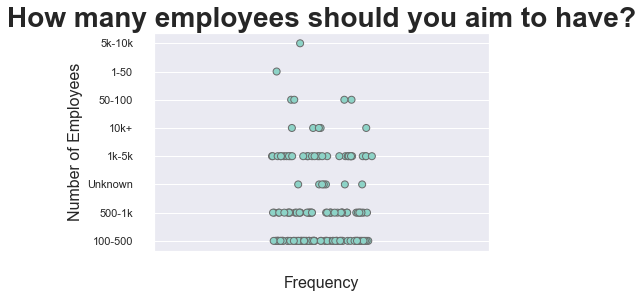

<Figure size 432x288 with 0 Axes>

In [3]:
#----employee countplot----
sns.set(font_scale = 1)
order=["1-50", "50-100", "100-500", "500-1k", "1k-5k", "5k-10k", "10k+", "Unknown"]
employeePlot = sns.stripplot(y=df.Employees, orient="v", order=order, size=7, palette="Set3", jitter=0.15, linewidth=1)
employeePlot.set_ylabel("Number of Employees",fontsize=16)
employeePlot.set_xlabel("Frequency",fontsize=16)
employeePlot.tick_params(axis='both', which='major', pad=15)
sns.set(font_scale = 3)
plt.title('How many employees should you aim to have?', weight='bold').set_fontsize('28')
#plt.savefig('employeePlot.png', dpi=800)
plt.figure()

/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



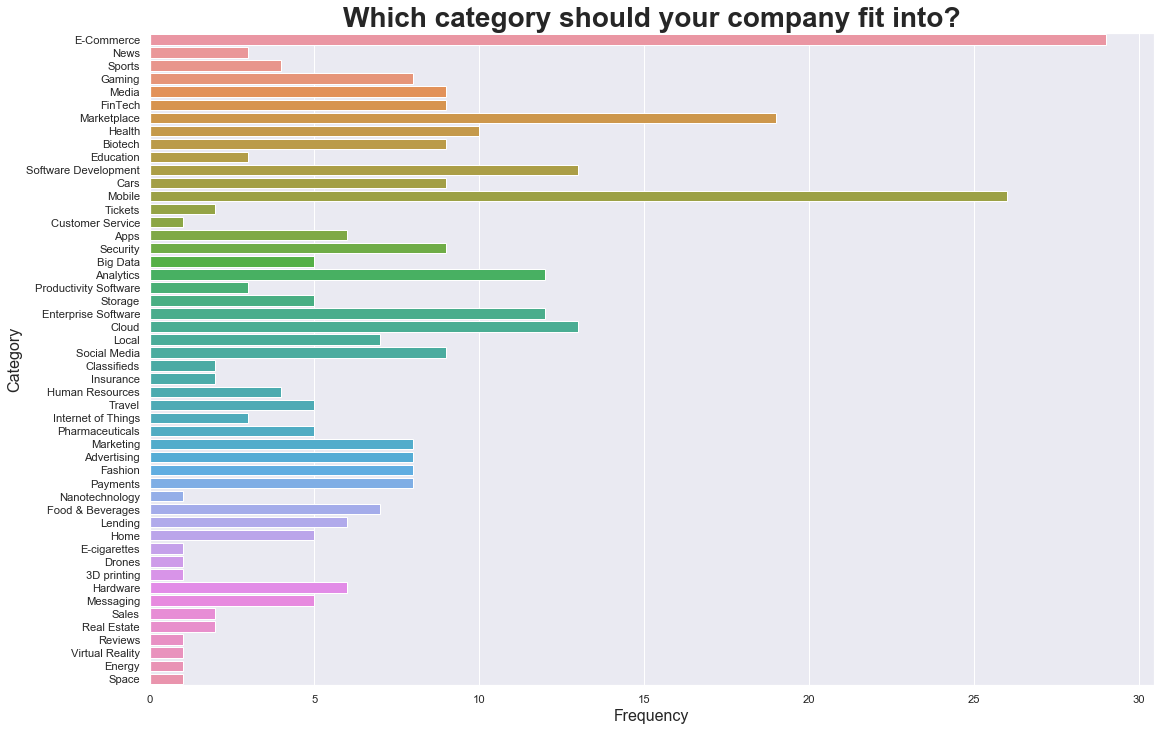

In [4]:
catlist = []
#----category plot-----
sns.set(font_scale = 1)
for i in range(0,162):
    catlist.extend(df.Categories[i])
catlist = [x for x in catlist if x != 'Unicorn']
for i in range(0,len(catlist)):
    df.set_value(str(i), 'AllCat', catlist[i])

sns.set(rc={'figure.figsize':(18,12)}, font_scale = 1.02)
categPlot = sns.countplot(y=df.AllCat, orient = 'h')
categPlot.set_ylabel("Category",fontsize=16)
categPlot.set_xlabel("Frequency",fontsize=16)
sns.set(font_scale = 3)
plt.title('Which category should your company fit into?', weight='bold').set_fontsize('28')
#plt.savefig('categPlot.png', dpi=800, bbox_inches='tight')


In [5]:
stri = ""
for i in range(0,163):
    x = "'"+str(i)+"', "
    stri+=x
stri=stri[:-2]
print(stri)

'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158

In [6]:
#------heatmap--------- (did not work)
thedata = geoplotlib.utils.read_csv('coordinates1.csv')
#geoplotlib.dot(thedata,color="blue", point_size=3)
white = geoplotlib.utils.DataAccessObject({'name':['white'],'lat':[50.4444167],'lon':[3.9485]})
geoplotlib.markers(thedata, str('s-tog.png'), f_tooltip=None, marker_preferred_size=50)
geoplotlib.savefig('map')

Traceback (most recent call last):
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/geoplotlib/__init__.py", line 30, in _runapp
    app.start()
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/geoplotlib/core.py", line 309, in start
    l.invalidate(self.proj)
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/geoplotlib/layers.py", line 674, in invalidate
    self.painter.sprites(self.marker, x, y, self.scale)
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/geoplotlib/core.py", line 489, in sprites
    sprite = Sprite(image, batch=self._batch)
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/pyglet/sprite.py", line 243, in __init__
    self._texture = img.get_texture()
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/pyglet/image/__init__.py", line 859, in get_texture
    force_rectangle)
  File "/Users/andy/anaconda3/lib/python3.6/site-packages/pyglet/image/__init__.py", line 850, in create_texture
    self.anchor_x, self.anchor_y

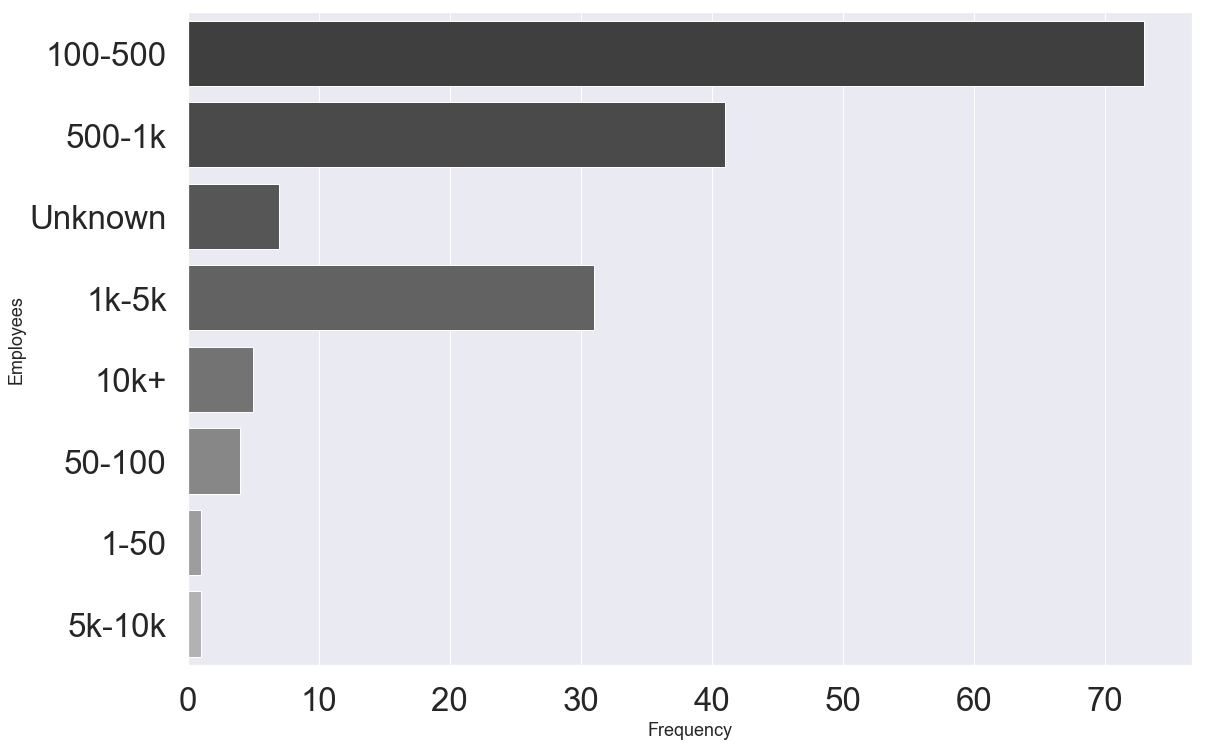

In [7]:
#----employee countplot---- (did not use)
employeePlot = sns.countplot(y=df.Employees, palette="Greys_d", orient="h")
employeePlot.set_ylabel("Employees",fontsize=18)
employeePlot.set_xlabel("Frequency",fontsize=18)
employeePlot.tick_params(axis='both', which='major', pad=15)

In [11]:
import plotly.plotly as py
import pandas as pd

#counting frequencies of countries
loc = df['Location'].tolist()
usa = []
other = []
for i in range(0,162):
    if "," in loc[i]:
        usa.append(loc[i])
    else:
         other.append(loc[i])         

usaCount = len(usa)
other = [x for x in other if x != "Shanghai"]
other = [x for x in other if x != "Beijing"]    
other = [x for x in other if x != "Singapore"] 
print (other)

df = pd.read_csv('pmap.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['ISO'],
        z = df['frequency'],
        #text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = 'Unicorns')
      ) ]

layout = dict(
    title = 'Where should your company be located?',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        showcountries = True,
        projection = dict(
            type = 'Mercator'
        )
    ),
    font=dict(family='italic', size=20, color='black')
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='map' )